# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.074922e+01     6.952221e+00
 * time: 0.004339933395385742
     1     2.883047e+01     4.918385e+00
 * time: 0.01265096664428711
     2     2.497955e+01     7.030260e+00
 * time: 0.032418012619018555
     3     1.919499e+01     3.817788e+00
 * time: 0.05592203140258789
     4     1.320546e+01     1.462107e+00
 * time: 0.07939982414245605
     5     1.275462e+01     3.069474e+00
 * time: 0.09487581253051758
     6     1.199596e+01     1.800047e+00
 * time: 0.1106410026550293
     7     1.127859e+01     2.008272e+00
 * time: 0.1262359619140625
     8     1.039987e+01     1.253012e+00
 * time: 0.146392822265625
     9     9.752225e+00     1.507444e+00
 * time: 0.24265098571777344
    10     9.416185e+00     8.740852e-01
 * time: 0.2577829360961914
    11     9.262637e+00     7.953494e-01
 * time: 0.272691011428833
    12     9.173641e+00     5.093660e-01
 * time: 0.28775501251220703
    13     9.127092e+00     9.593886e-01
 * time: 0.29

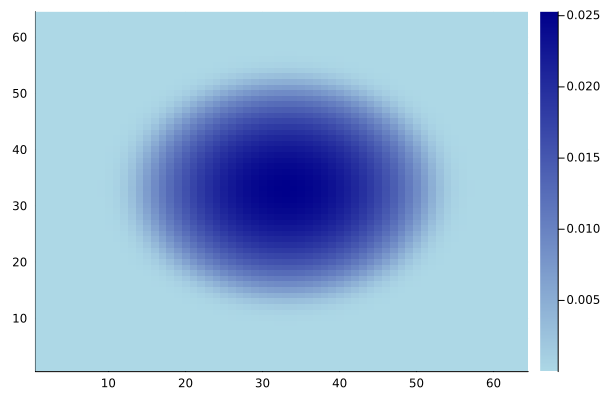

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)